<a href="https://colab.research.google.com/github/it-dieuanh/Predicting-the-Wear-and-Tear-of-Industrial-Machinery/blob/main/BAI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_X = pd.read_csv('/content/X_train.csv')
df_y = pd.read_csv('/content/y_train.csv')

print(df_X.head())
print(df_y.head())

   cat1         num7          num1          num2         num8  cat2  cat3  \
0    18  3002.615162  6.844050e+05  5.438812e+05  1984.083468     3     2   
1    23  1753.001446  9.696060e+05  3.536075e+06  1616.969212     3     2   
2    23  2534.010019  1.518483e+06  5.372982e+06  1984.083468     3     2   
3    28  2846.413447  1.238664e+06  1.468111e+06  1800.526340     3     2   
4    33  2846.413447  1.486196e+06  3.328124e+06  1616.969212     3     2   

   cat4  cat5          num3          num4   cat6  cat7    cat8         num9  \
0    23    66  5.906644e+05  1.497083e+05  14005     5  490516  5976.987619   
1    35    58  9.573292e+05  1.422117e+03  13704     5  490281  5957.691379   
2    23    66  1.499355e+06  1.422117e+03  13907     5  490461  5931.756421   
3    23    50  7.128860e+05  8.911393e+05  13767     5  490721  5966.821025   
4    23    58  7.607118e+05  1.234051e+06  13858     5  490361  5987.458534   

          num10          num5          num6         num11     

_______________________________________________________________________
# **Feature Engineering**


In [ ]:
#Delete NaN Rows in Y -> Avoid Data Leakage
nan_index = df_y.columns[df_y.isna().any()].tolist()
X= df_X.drop(nan_index, axis=1)
y=  df_y.drop(nan_index, axis=1)


In [ ]:
#Delete NaN Val in X

# X.drop(['num12'], axis =1 , inplace = True)

print(X.shape)
print(y.shape)


(17479, 20)
(17479, 1)


In [ ]:
# prompt: sort by columns name of X

X = X.sort_index(axis=1)
print(X.head())


   cat1  cat2  cat3  cat4  cat5   cat6  cat7    cat8          num1  \
0    18     3     2    23    66  14005     5  490516  6.844050e+05   
1    23     3     2    35    58  13704     5  490281  9.696060e+05   
2    23     3     2    23    66  13907     5  490461  1.518483e+06   
3    28     3     2    23    50  13767     5  490721  1.238664e+06   
4    33     3     2    23    58  13858     5  490361  1.486196e+06   

          num10         num11      num12          num2          num3  \
0 -22722.298810  3.164912e+05        NaN  5.438812e+05  5.906644e+05   
1 -22690.811020  1.170566e+06        NaN  3.536075e+06  9.573292e+05   
2 -22698.585783  1.454420e+06        NaN  5.372982e+06  1.499355e+06   
3 -22715.495892  4.500649e+05        NaN  1.468111e+06  7.128860e+05   
4 -22684.785579  1.311595e+06 -74.511949  3.328124e+06  7.607118e+05   

           num4          num5          num6         num7         num8  \
0  1.497083e+05  1.087513e+06  1.293984e+06  3002.615162  1984.083468   


____________________________________________________________________
# **Data Analysis**

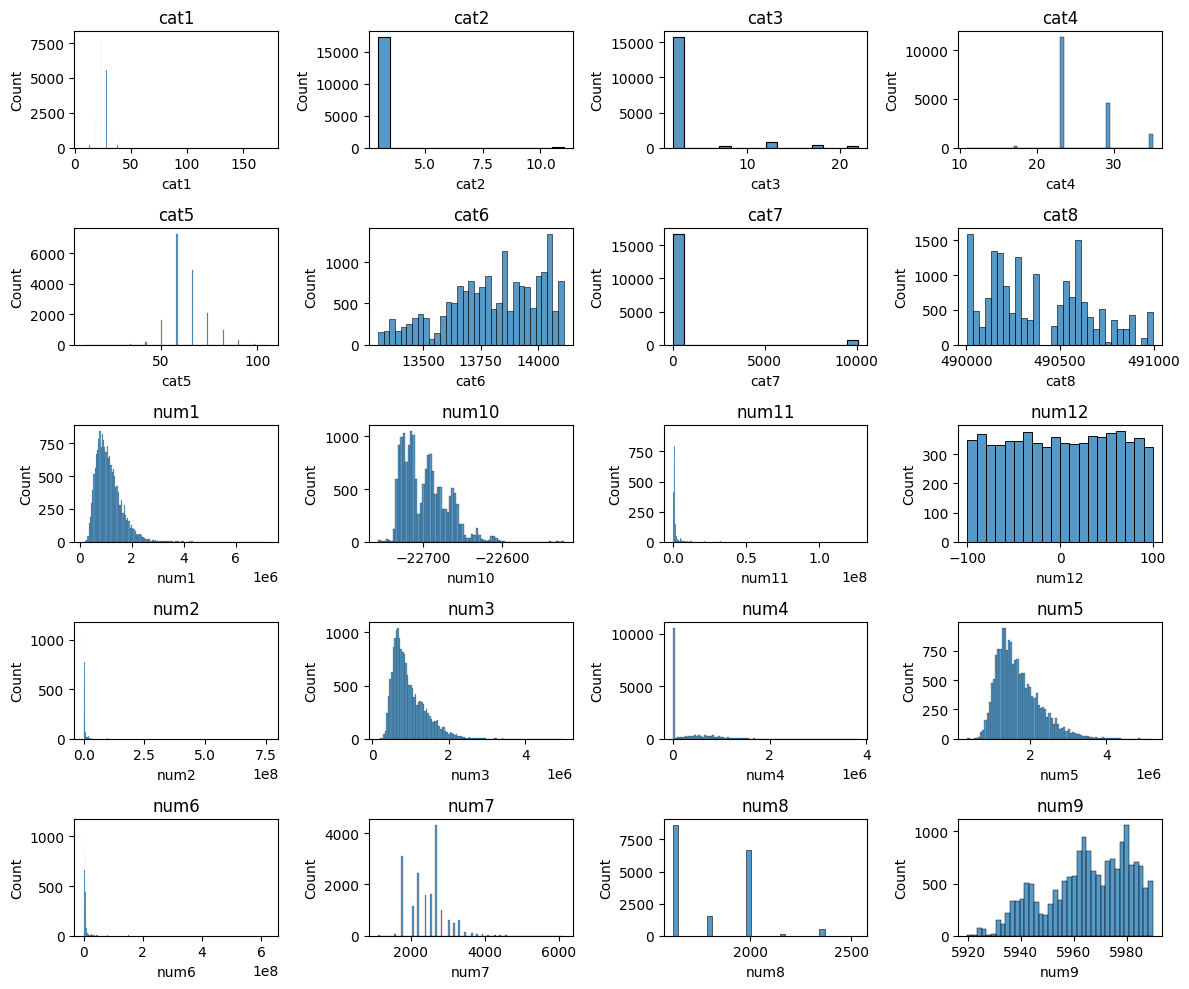

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols= 4, figsize=(12, 10))

for n, cols in enumerate(X):
  axs = axes[n//4, n%4]
  sns.histplot(data = X, x= cols, ax=axs)
  axs.set_title(cols)

plt.tight_layout()
plt.show()


Nhận xét là các giá trị num là phải đưa về log10

In [ ]:
def transform_data(X):
  X_temp= x.copy()
  new_cols = []
  for cols in X:
    if 'cat' in cols or 'log' in cols:
      continue
    if X[cols].min()<0:
      continue
    # print(cols)
    title= 'log'+cols
    X_temp[title] = np.log10(X_temp[cols])

  return [X_temp, new_cols]




In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mm_scaler = MinMaxScaler()
# print(mm_scaler.fit_transform(X))

In [ ]:
# fig, axes = plt.subplots(nrows=4, ncols= 3, figsize=(12, 10))

# X, new_cols = transform_data(X)

# #Chú ý chỉ chạy code này 1 lần vì nó thay đổi X
# #Nếu bị thay đổi dẫn đến lỗi thì reset session


# for n,cols in enumerate(new_cols):
#   # print(n)
#   axs = axes[n//3, n%3]
#   sns.histplot(data = X, x= cols, ax=axs)
#   axs.set_title(cols)

# plt.tight_layout()
# plt.show()

**Mutual Info**

In [ ]:
from sklearn.feature_selection import mutual_info_regression



def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
# print(mi_scores)  # show a few features with their MI scores

ValueError: Input X contains NaN.

In [ ]:
def plot_scores(scores, name):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(name)


plt.figure(dpi=100, figsize=(8, 5))
plot_scores(mi_scores, "Mutual Information Scores")

# **Train Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
lr_model=  LinearRegression()
lr_model.fit(X_train, y_train)

Random forest

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

Nhận xét: Model RandomForest train chậm

Hyper parameters tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define parameter distribution
# param_dist = {
#     'n_estimators': randint(50, 500),
#     'max_depth': randint(5, 50),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 10),
#     'max_features': ['sqrt', 'log2']
# }

# # Random Search
# random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist,
#                                    n_iter=20, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
# random_search.fit(X_train, y_train)

# # Best parameters
# print(random_search.best_params_)

In [ ]:
rf_tuned = RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt', min_samples_split=4, n_estimators=1000, random_state=219)
rf_tuned.fit(X_train, y_train)

XG Boost

In [ ]:
from xgboost import XGBRegressor
xgb_model_500 = XGBRegressor(n_estimators = 500, learning_rate = 0.1)
xgb_model_500.fit(X_train, y_train)



Hyper paramter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 300, 500, 1000, 1500,],
#     'max_depth': [3, 6, 9, 16, 20],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 1, 5]
# }

# # Grid Search

# grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print(grid_search.best_params_)


Ngược lại: Model XGBoost train rất nhanh (gấp 20 lần)

---




In [ ]:
#Thống kê
plt.figure(figsize=(10,3))
def print_score(model):
  y_pred = model.predict(X_test)
  return root_mean_squared_error(y_test, y_pred)
model_scores = pd.Series({
    'Linear Regression': print_score(lr_model),
    'Random Forest':print_score(rf_model),
    'Random Forest Tuned': print_score(rf_tuned),
    'XGBoost 500': print_score(xgb_model_500),
})
print(model_scores)
plot_scores(model_scores, 'MODEL RMSE')

In [ ]:
X_public_test = pd.read_csv('/content/X_public_test.csv')
X_public_test = X_public_test.sort_index(axis=1)
# print(X_public_test.isna().sum())
# X_public_test.drop(['num12'], axis =1 , inplace = True)

# X_public_test = transform_data(X_public_test)[0]


X_public_pred = pd.DataFrame(rf_model.predict(X_public_test))
X_public_pred.columns = y.columns


X_public_pred.to_csv('predictions.csv', index = 0, index_label = 0, sep = ',')